# `run.test`

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
#default_exp run.test

In [ ]:
# %load ../../../HPA-competition-solutions/bestfitting/src/run/test.py

In [ ]:
#export

import os, sys
import argparse
from tqdm import tqdm
import numpy as np
import pandas as pd
from pathlib import Path
import cv2
import pycocotools.mask as mutils

import torch
import torch.optim
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SequentialSampler
from torch.nn import DataParallel
import torch.nn.functional as F
from torch.autograd import Variable

from kgl_humanprotein.config.config import *
from kgl_humanprotein.data_process import *
from kgl_humanprotein.utils.common_util import *
from kgl_humanprotein.networks.imageclsnet import init_network
from kgl_humanprotein.datasets.protein_dataset import ProteinDataset
from kgl_humanprotein.utils.augment_util import *
from kgl_humanprotein.utils.log_util import Logger

run on collie.local


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
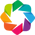

In [ ]:
import holoviews as hv
hv.extension('bokeh')

In [ ]:
dir_hpa = Path('../../kgl_humanprotein_data/hpa-single-cell-image-classification')
dir_test = dir_hpa / 'test'

In [ ]:
imgids = imgids_from_directory(dir_test)

## Dummy submission

In [ ]:
#export

def dummy_predict_image(img):
    pred = 0
    conf = .5
    
    height, width = img.shape[:2]
    bmask = np.zeros((height, width), dtype=np.uint8)
    bmask[:height//3, :width//3] = 1
    
    rle = mutils.encode(np.asfortranarray(bmask))
    coco_rle = {'size': [height, width], 'counts': rle}
    return pred, conf, rle


def write_dummy_submission(dir_test, imgids, dst=Path('./')):
    
    with open(dst/'submission.csv', mode='w') as f:
        print(
            'ID,ImageWidth,ImageHeight,PredictionString', file=f)
        
        for imgid in imgids:
            img = load_RGBY_image(dir_test, imgid)

            pred, conf, rle = dummy_predict_image(img)
            bmask = mutils.decode(rle)
            rle = encode_binary_mask(bmask.astype(bool))

            predstring = f'{pred} {conf} {rle}'

            height, width = img.shape[:2]
            submn_img = f'{imgid}, {width}, {height}, {predstring}'
            print(submn_img, file=f)

In [ ]:
# (hv.RGB(img[...,:3]) * hv.Image(bmask)).opts(
#     hv.opts.RGB(yaxis=None, xaxis=None),
#     hv.opts.Image(yaxis=None, xaxis=None, alpha=.5)
# )

In [ ]:
write_dummy_submission(dir_test, imgids, )

In [ ]:
pd.read_csv('submission.csv')

ID  ImageWidth  ImageHeight  \
0  0040581b-f1f2-4fbe-b043-b6bfea5404bb        2048         2048   
1  004a270d-34a2-4d60-bbe4-365fca868193        2048         2048   

                                    PredictionString  
0   0 0.5 eNoziEo1SIsyNBgFo2AUjIJRQB0QEBCTagQADzI...  
1   0 0.5 eNoziEo1SIsyNBgFo2AUjIJRQB0QEBCTagQADzI...

## Cell segmentation

In [ ]:
dir_segmentator_models = Path('../../hpa-cell-segmentation-models/')

In [ ]:
segmentator = load_segmentator(dir_segmentator_models, padding=True)

No GPU found, using CPU.


please compile abn


In [ ]:
df_cells = segment_images(dir_test, imgids, segmentator)

100%|██████████| 2/2 [00:50<00:00, 25.20s/it]


In [ ]:
pth_cells = Path(DATA_DIR)/'test'/'test.feather'

In [ ]:
df_cells.to_feather(pth_cells)

## Generate square crops of certain size

In [ ]:
df_cells = pd.read_feather(pth_cells)

In [ ]:
img_size = 768

In [ ]:
dir_crops = Path(DATA_DIR)/'test'/f'images_{img_size}'
dir_crops.mkdir(exist_ok=True)

In [ ]:
df_cells = generate_crops(
    df_cells, dir_test, dir_crops, out_sz=img_size)

In [ ]:
# img = load_RGBY_image(dir_crops, df_cells['Id'].iloc[21])

# hv.RGB(img[...,:3])

:RGB   [x,y]   (R,G,B)

## Predict on cell crops

In this case, the test images are the image crops, each containing a cell.

In [ ]:
#export

datasets_names = ['test', 'val']
split_names = ['random_ext_folds5', 'random_ext_noleak_clean_folds5']
augment_list = ['default', 'flipud', 'fliplr','transpose', 'flipud_lr',
                'flipud_transpose', 'fliplr_transpose', 'flipud_lr_transpose']

In [ ]:
#export

def test(out_dir, gpu_id='0', arch='class_densenet121_dropout', 
         num_classes=19, in_channels=4, img_size=768, crop_size=512, 
         batch_size=32, workers=3, fold=0, augment='default', seed=100,  
         seeds=None, dataset='test', split_name='random_ext_folds5',
         predict_epoch=None):  
    '''
    PyTorch Protein Classification
    
    Args:
        outdir (str): Name of directory where model is saved.  This will 
            also be used to name a newly created directory for saving the
            predicted results.
        gpu_id (str): GPU id used for predicting. Default: ``'0'``
        arch (str): Model architecture. Default: ``'class_densenet121_dropout)'``
        num_classes (int): Number of classes. Default: 19
        in_channels (int): In channels. Default: 4
        img_size (int):  Image size. Default: 768
        crop_size (int): Crop size. Default: 512
        batch_size (int): Train mini-batch size. Default: 32
        workers (int): Number of data loading workers. Default: 3
        fold (int): Index of fold. Default: 0
        augment (str):  Comma-separated string of one or more of 
            the following: ``'default'``, ``'flipud'``, ``'fliplr'``,
            ``'transpose'``, ``'flipud_lr'``, ``'flipud_transpose'``, 
            ``'fliplr_transpose'``, ``'flipud_lr_transpose'``.
            Default: ``'default'``
        seed (int):  Random seed. Default: 100
        seeds (str): Predict seed. Default: None
        dataset (str, optional): ``'test'``, or ``'val'``. Default: ``'test'``
        split_name (str, optional): ``'random_ext_folds5'``, or
            ``'random_ext_noleak_clean_folds5'``. Default: 'random_ext_folds5'
        predict_epoch (int): Number epoch to predict. Default: None
    '''
    if dataset not in datasets_names:
        print(f'`dataset` needs to be one of {datasets_names}.')
        raise

    if split_name not in split_names:
        print(f'`split_name` must be one of {split_names}.')
        raise

    log_out_dir = opj(RESULT_DIR, 'logs', out_dir, 'fold%d' % fold)
    if not ope(log_out_dir):
        os.makedirs(log_out_dir)
    log = Logger()
    log.open(opj(log_out_dir, 'log.submit.txt'), mode='a')

    predict_epoch = 'final' if predict_epoch is None else '%03d' % predict_epoch
    network_path = opj(RESULT_DIR, 'models', out_dir, 'fold%d' % fold, '%s.pth' % predict_epoch)

    submit_out_dir = opj(RESULT_DIR, 'submissions', out_dir, 'fold%d' % fold, 'epoch_%s' % predict_epoch)
    log.write(">> Creating directory if it does not exist:\n>> '{}'\n".format(submit_out_dir))
    if not ope(submit_out_dir):
        os.makedirs(submit_out_dir)

    # setting up the visible GPU
    os.environ['CUDA_VISIBLE_DEVICES'] = gpu_id

    augment = augment.split(',')
    for augment_ in augment:
        if augment_ not in augment_list:
            raise ValueError('Unsupported or unknown test augmentation: {}!'.format(augment))

    model_params = {}
    model_params['architecture'] = arch
    model_params['num_classes'] = num_classes
    model_params['in_channels'] = in_channels
    model = init_network(model_params)

    log.write(">> Loading network:\n>>>> '{}'\n".format(network_path))
    checkpoint = torch.load(network_path)
    _, in_features = checkpoint['state_dict']['logit.weight'].shape
    logit_weight = torch.randn(num_classes, in_features)
    logit_bias = torch.randn(num_classes)
    checkpoint['state_dict']['logit.weight'] = logit_weight
    checkpoint['state_dict']['logit.bias'] = logit_bias
    model.load_state_dict(checkpoint['state_dict'])
    log.write(">>>> loaded network:\n>>>> epoch {}\n".format(checkpoint['epoch']))

    # moving network to gpu and eval mode
    model = DataParallel(model)
    model.to(DEVICE)
    model.eval()

    # Data loading code
    if dataset == 'test':
        test_split_file = opj(DATA_DIR, 'test', 'test.feather')
    elif dataset == 'val':
        test_split_file = opj(DATA_DIR, 'split', split_name, 'random_valid_cv%d.csv' % fold)
    else:
        raise ValueError('Unsupported or unknown dataset: {}!'.format(dataset))
    test_dataset = ProteinDataset(
        test_split_file,
        img_size=img_size,
        is_trainset=(dataset != 'test'),
        return_label=False,
        in_channels=in_channels,
        transform=None,
        crop_size=crop_size,
        random_crop=False,
    )
    test_loader = DataLoader(
        test_dataset,
        sampler=SequentialSampler(test_dataset),
        batch_size=batch_size,
        drop_last=False,
        num_workers=0, #num_workers=workers,
        pin_memory=False, #pin_memory=True,
    )

    seeds = [seed] if seeds is None else [int(i) for i in seeds.split(',')]
    for seed in seeds:
        test_dataset.random_crop = (seed != 0)
        for augment_ in augment:
            test_loader.dataset.transform = eval('augment_%s' % augment_)
            if crop_size > 0:
                sub_submit_out_dir = opj(submit_out_dir, '%s_seed%d' % (augment_, seed))
            else:
                sub_submit_out_dir = opj(submit_out_dir, augment_)
            if not ope(sub_submit_out_dir):
                os.makedirs(sub_submit_out_dir)
            with torch.no_grad():
                predict(test_loader, model, sub_submit_out_dir, dataset)
                
    return submit_out_dir



def predict(test_loader, model, submit_out_dir, dataset):
    all_probs = []
    img_ids = np.array(test_loader.dataset.img_ids)
    for it, iter_data in tqdm(enumerate(test_loader, 0), total=len(test_loader)):
        images, indices = iter_data
        images = Variable(images.to(DEVICE), volatile=True)
        outputs = model(images)
        logits = outputs

        probs = F.sigmoid(logits).data
        all_probs += probs.cpu().numpy().tolist()
    img_ids = img_ids[:len(all_probs)]
    all_probs = np.array(all_probs).reshape(len(img_ids), -1)

    np.save(opj(submit_out_dir, 'prob_%s.npy' % dataset), all_probs)

    result_df = prob_to_result(all_probs, img_ids)
    result_df.to_csv(opj(submit_out_dir, 'results_%s.csv.gz' % dataset), index=False, compression='gzip')

def prob_to_result(probs, img_ids, th=0.5):
    probs = probs.copy()
    probs[np.arange(len(probs)), np.argmax(probs, axis=1)] = 1

    pred_list = []
    for line in probs:
        s = ' '.join(list([str(i) for i in np.nonzero(line > th)[0]]))
        pred_list.append(s)
    result_df = pd.DataFrame({ID: img_ids, PREDICTED: pred_list})
    return result_df

In [ ]:
out_dir = 'external_crop512_focal_slov_hardlog_class_densenet121_dropout_i768_aug2_5folds'

gpu_id = '0'
arch = 'class_densenet121_dropout'
img_size = 768
crop_size = 512
seeds = '0,1' # '0,1,2,3',
batch_size = 12
fold = 0
augment = 'default,flipud' #'default,flipud,fliplr,transpose,flipud_lr,flipud_transpose,fliplr_transpose,flipud_lr_transpose')

In [ ]:
submit_out_dir = test(out_dir, 
                      gpu_id=gpu_id, arch=arch, img_size=img_size, 
                      crop_size=crop_size, seeds=seeds, 
                      batch_size=batch_size, fold=fold, augment=augment)

>> Creating directory if it does not exist:
>> '../../kgl_humanprotein_data/result/submissions/external_crop512_focal_slov_hardlog_class_densenet121_dropout_i768_aug2_5folds/fold0/epoch_final'
>> Using pre-trained model.
>> Loading network:
>>>> '../../kgl_humanprotein_data/result/models/external_crop512_focal_slov_hardlog_class_densenet121_dropout_i768_aug2_5folds/fold0/final.pth'
>>>> loaded network:
>>>> epoch 52


  0%|          | 0/3 [00:00<?, ?it/s]

../../kgl_humanprotein_data/protein/test/images_768
../../kgl_humanprotein_data/protein/train/external_v18_768


100%|██████████| 3/3 [00:24<00:00,  8.27s/it]


## Write submission file

In [ ]:
dir_results = Path(submit_out_dir)

In [ ]:
#export

def organise_results(df_cells, dir_results):
    if isinstance(dir_results, str):
        dir_results = Path(dir_results)
        
    preds = pd.read_csv(
        dir_results/'default_seed0'/'results_test.csv.gz')
    probs = np.load(dir_results/'default_seed0'/'prob_test.npy')

    preds = pd.merge(
        df_cells, preds, left_on='Id', right_on='Id', how='inner')

    preds['Image_Id'] = preds.apply(
        lambda o: o['Id'].split('_')[0], axis=1)
    
    return preds, probs

In [ ]:
preds, probs = organise_results(df_cells, dir_results)

In [ ]:
#export

def write_submission_csv(preds, probs, dir_out=Path('/kaggle/working')):
    
    with open(dir_out / 'submission.csv', mode='w') as f_submission:
        print('ID,ImageWidth,ImageHeight,PredictionString', 
              file=f_submission)

        for imgid, df in preds.groupby('Image_Id'):

            pred_string = []
            for i, r in df.iterrows():

                bmask = mutils.decode(r['rle'])
                rle = encode_binary_mask(bmask.astype(bool))

                labels = r['Predicted'].split()
                labels = np.array([int(label) for label in labels])

                confidences = probs[i, labels]

                # To debug submission,
                # include just the first predicted label
                labels, confidences = labels[:1], confidences[:1]
                
                for label, confidence in zip(labels, confidences):
                    pred_string.append(f'{label} {confidence} {rle}')

            pred_string = ' '.join(pred_string)

            img_h, img_w = df.iloc[0]['rle']['size']
            img_string = f'{imgid}, {img_w}, {img_h}, {pred_string}'

            print(img_string, file=f_submission)


In [ ]:
dir_out = Path('./')

In [ ]:
write_submission_csv(preds, probs, dir_out=dir_out)

In [ ]:
len(pd.read_csv('submission.csv').loc[1,'PredictionString'])

10863

In [ ]:
pd.read_csv('submission.csv')

ID  ImageWidth  ImageHeight  \
0  0040581b-f1f2-4fbe-b043-b6bfea5404bb        2048         2048   
1  004a270d-34a2-4d60-bbe4-365fca868193        2048         2048   

                                    PredictionString  
0   0 0.9518872499465942 eNqlVNtygjAQ/aUspHam0+lD...  
1   1 0.9539976119995117 eNoLCEhJMAgwDMg3NPQ39Df2...